## Визуализация данных средствами pandas

### **Напишите ваши ФИО и номер группы здесь:**

## 1. Визуализация данных средствами Pandas

In [7]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

#размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 4, 4
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('../resources/lab1_3/marketing_eng.csv')
df.describe()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,PERSONAL_INCOME,OWN_AUTO,WORK_TIME,LOAN_MAX_DLQ_AMT
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,1.385500e+04,15223.000000
mean,0.119030,40.406096,0.909610,0.134468,0.654536,13853.836323,0.116337,2.922120e+02,243.021626
std,0.323835,11.601068,0.286748,0.341165,0.475535,9015.467617,0.320844,2.436483e+04,836.100116
min,0.000000,21.000000,0.000000,0.000000,0.000000,24.000000,0.000000,1.000000e+00,0.000000
25%,0.000000,30.000000,1.000000,0.000000,0.000000,8000.000000,0.000000,2.400000e+01,0.000000
50%,0.000000,39.000000,1.000000,0.000000,1.000000,12000.000000,0.000000,4.800000e+01,0.000000
75%,0.000000,50.000000,1.000000,0.000000,1.000000,17000.000000,0.000000,1.100000e+02,0.000000
max,1.000000,67.000000,1.000000,1.000000,1.000000,250000.000000,2.000000,2.867959e+06,28012.200000


In [9]:
df.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,EDUCATION,MARITAL_STATUS,ORG_TP_STATE,JOB_DIR,PERSONAL_INCOME,OWN_AUTO,WORK_TIME,LOAN_MAX_DLQ_AMT
0,0,49,1,0,1,Среднее специальное,Состою в браке,Частная компания,Вспомогательный техперсонал,5000.0,0,18.0,1580.0
1,0,32,1,0,1,Среднее,Состою в браке,Индивидуальный предприниматель,Участие в основ. деятельности,12000.0,0,97.0,4020.0
2,0,52,1,0,1,Неполное среднее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,9000.0,0,84.0,0.0
3,0,39,1,0,1,Высшее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,25000.0,0,168.0,1590.0
4,0,30,1,0,0,Среднее,Состою в браке,Государственная комп./учреж.,Участие в основ. деятельности,12000.0,0,101.0,2230.0


In [10]:
df.dtypes

TARGET                 int64
AGE                    int64
SOCSTATUS_WORK_FL      int64
SOCSTATUS_PENS_FL      int64
GENDER                 int64
EDUCATION             object
MARITAL_STATUS        object
ORG_TP_STATE          object
JOB_DIR               object
PERSONAL_INCOME      float64
OWN_AUTO               int64
WORK_TIME            float64
LOAN_MAX_DLQ_AMT     float64
dtype: object

Cамый простой и зачастую удобный способ визуализировать данные из pandas dataframe — это воспользоваться функцией plot.

Для примера построим график дохода в зависимости от возраста. Для начала отфильтруем только нужные нам столбцы, затем посчитаем средний доход по возрасту и у получившегося dataframe вызовем функцию plot без параметров.

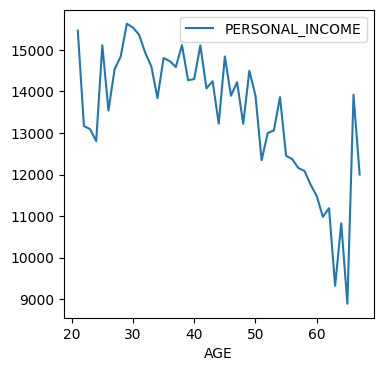

In [11]:
df[['PERSONAL_INCOME', 'AGE']].groupby('AGE').mean().plot();

Гистограмма распределения по уровню образования

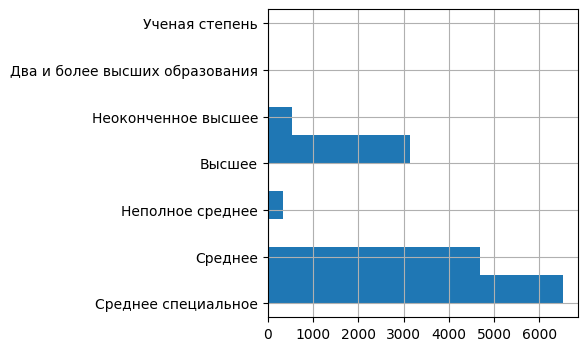

In [12]:
df['EDUCATION'].hist(orientation='horizontal');

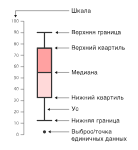
Диаграммы размаха («ящик с усами») (Box and Whisker Plot или Box Plot) – это удобный способ визуального представления групп числовых данных через квартили.

Прямые линии, исходящие из ящика, называются «усами» и используются для обозначения степени разброса (дисперсии) за пределами верхнего и нижнего квартилей. Выбросы иногда отображаются в виде отдельных точек, находящихся на одной линии с усами. Диаграммы размаха могут располагаться как горизонтально, так и вертикально.

Диаграммы размаха, как правило, используются в описательной статистике и позволяют быстро исследовать один или более наборов данных в графическом виде. Несмотря на то, что в сравнении с гистограммой или графиком плотности, этот график может показаться примитивным, его преимущество – в экономии пространства, что особенно удобно при сравнении распределений между большим количеством групп или наборов данных.

Виды наблюдений, которые можно сделать на основе ящика с усами:

* Каковы ключевые значения, например: средний показатель, медиана 25го перцентиля и так далее.

* Существуют ли выбросы и каковы их значения.

* Симметричны ли данные.

* Насколько плотно сгруппированы данные.

* Смещены ли данные и, если да, то в каком направлении.


PERSONAL_INCOME    Axes(0.125,0.11;0.775x0.77)
dtype: object

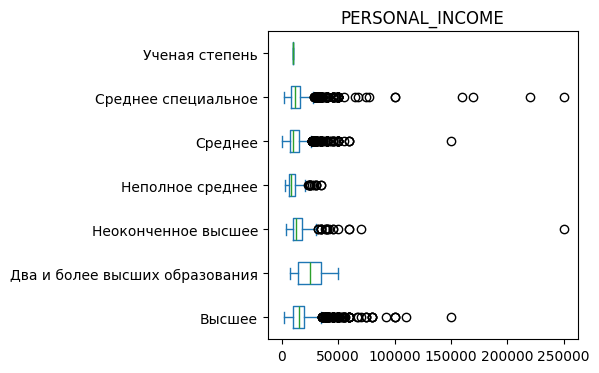

In [17]:
df.plot(kind ='box', column='PERSONAL_INCOME', by='EDUCATION', vert=False)

<Axes: xlabel='AGE', ylabel='PERSONAL_INCOME'>

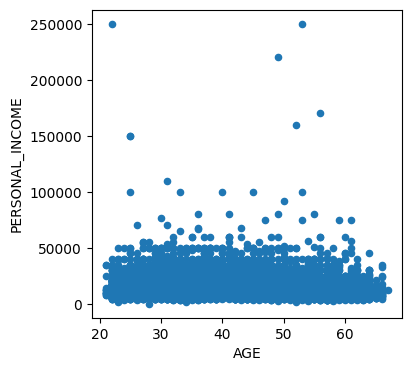

In [16]:
df.plot(kind='scatter', x='AGE', y='PERSONAL_INCOME')

Круговая диаграмма распределения пассажиров по количеству автомобилей во владении

<Axes: ylabel='count'>

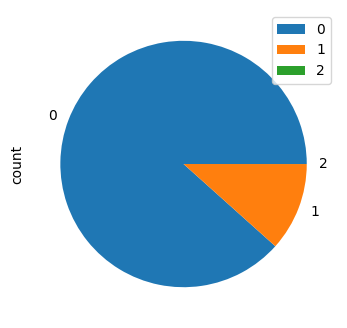

In [15]:
df[['OWN_AUTO']].groupby('OWN_AUTO').agg(count=('OWN_AUTO','size')).plot(kind='pie', y='count')
